In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import json
import time
import pickle
import urllib
import warnings
import pandas as pd
import numpy as np

import sklearn
import xgboost as xgb
from sklearn import datasets, svm, metrics
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.experimental import enable_halving_search_cv  # Required for HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV

import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from pathlib import Path
warnings.filterwarnings("ignore", category=FutureWarning)

# Formal analysis

In [2]:
os.chdir("C:\\Users\\omkarp\\Downloads\\Hannes\\Trips\\")
df_analysis = pd.read_csv('GOTSpatial.csv', index_col=0)
df_analysis

,BASOMRÅDE,Area_m2,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip
0,10101,72488.5,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,0.433173,0.000000,...,1323.043464,681.868716,963.726336,6.579349,0.07,351.0,0.199430,0.527066,0.344729,7.901408
1,10102,31282.1,21470.000000,46.1,6.2,313100.0,0.059934,982.116529,0.248263,0.287340,...,212.327457,28.052074,1804.743632,0.000000,0.03,658.0,0.205167,0.477204,0.343465,2.987578
2,10103,30098.6,16036.666667,46.1,6.2,313100.0,0.059934,1118.112529,0.311725,0.000000,...,488.501523,380.970685,1155.424310,0.000000,0.03,486.0,0.240741,0.452675,0.294239,4.353846
3,10104,43917.9,12127.500000,46.1,6.2,313100.0,0.059934,982.790807,0.085758,0.000000,...,502.799921,347.724775,1429.946626,0.000000,0.04,481.0,0.207900,0.478170,0.328482,3.997732
4,10105,37373.0,14377.500000,46.1,6.2,313100.0,0.059934,1073.130132,0.309373,0.000000,...,794.684111,72.491636,2051.778623,0.000000,0.04,596.0,0.209732,0.491611,0.337248,9.456140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,20405,25995.6,12870.000000,41.5,4.7,276000.0,0.052011,1444.613615,0.000000,0.000000,...,57.269861,0.000000,177.208097,0.000000,0.03,859.0,0.167637,0.504075,0.704307,1.416667
456,41452,113951.0,246.363636,32.2,6.1,306500.0,0.039719,1084.976385,0.157632,0.243258,...,1233.241038,628.601238,2346.096518,113.837646,0.11,26.0,0.000000,0.230769,0.000000,2.932203
457,41651,189891.0,179.473684,44.5,2.9,441200.0,0.021989,1244.796758,0.258398,0.000000,...,745.527128,894.099454,2254.147142,765.810411,0.19,34.0,0.235294,0.529412,0.470588,2.529412
458,41720,86719.3,1.111111,51.0,2.5,329300.0,0.135372,1304.420983,0.000000,0.000000,...,400.878869,222.332570,0.000000,0.000000,0.09,1.0,0.000000,0.000000,0.000000,8.714286


In [3]:
df_analysis['Rd_Arte']=df_analysis['Rd_Arte']/df_analysis['AREA_KM2']
df_analysis['Rd_Other']=df_analysis['Rd_Other']/df_analysis['AREA_KM2']
df_analysis['Rd_Comml']=df_analysis['Rd_Comml']/df_analysis['AREA_KM2']
df_analysis['Rd_Cyc']=df_analysis['Rd_Cyc']/df_analysis['AREA_KM2']
df_analysis['Rd_Pedes']=df_analysis['Rd_Pedes']/df_analysis['AREA_KM2']
df_analysis

,BASOMRÅDE,Area_m2,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Comml,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip
0,10101,72488.5,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,0.433173,0.000000,...,18900.620916,9740.981664,13767.519092,93.990699,0.07,351.0,0.199430,0.527066,0.344729,7.901408
1,10102,31282.1,21470.000000,46.1,6.2,313100.0,0.059934,982.116529,0.248263,0.287340,...,7077.581895,935.069130,60158.121064,0.000000,0.03,658.0,0.205167,0.477204,0.343465,2.987578
2,10103,30098.6,16036.666667,46.1,6.2,313100.0,0.059934,1118.112529,0.311725,0.000000,...,16283.384091,12699.022833,38514.143680,0.000000,0.03,486.0,0.240741,0.452675,0.294239,4.353846
3,10104,43917.9,12127.500000,46.1,6.2,313100.0,0.059934,982.790807,0.085758,0.000000,...,12569.998018,8693.119379,35748.665659,0.000000,0.04,481.0,0.207900,0.478170,0.328482,3.997732
4,10105,37373.0,14377.500000,46.1,6.2,313100.0,0.059934,1073.130132,0.309373,0.000000,...,19867.102769,1812.290897,51294.465587,0.000000,0.04,596.0,0.209732,0.491611,0.337248,9.456140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,20405,25995.6,12870.000000,41.5,4.7,276000.0,0.052011,1444.613615,0.000000,0.000000,...,1908.995371,0.000000,5906.936576,0.000000,0.03,859.0,0.167637,0.504075,0.704307,1.416667
456,41452,113951.0,246.363636,32.2,6.1,306500.0,0.039719,1084.976385,0.157632,0.243258,...,11211.282163,5714.556709,21328.150160,1034.887692,0.11,26.0,0.000000,0.230769,0.000000,2.932203
457,41651,189891.0,179.473684,44.5,2.9,441200.0,0.021989,1244.796758,0.258398,0.000000,...,3923.826987,4705.786600,11863.932326,4030.581112,0.19,34.0,0.235294,0.529412,0.470588,2.529412
458,41720,86719.3,1.111111,51.0,2.5,329300.0,0.135372,1304.420983,0.000000,0.000000,...,4454.209657,2470.361887,0.000000,0.000000,0.09,1.0,0.000000,0.000000,0.000000,8.714286


In [4]:
df_analysis.columns

Index(['BASOMRÅDE', 'Area_m2', 'pop.dens',
       'Higher education 3 yrs or longer (%)',
       'openly unemployed and in programs', 'Average income',
       'Proportion of students', 'distance', 'LUP_Commercial',
       'LUP_Educational', 'LUP_Health', 'LUP_Other', 'LUP_Public',
       'LUP_Recreational', 'LUP_Residential', 'AreaProx', 'Rd_Resi', 'Rd_Arte',
       'Rd_Comml', 'Rd_Cyc', 'Rd_Pedes', 'Rd_Other', 'AREA_KM2', 'Population',
       'cars/pop', 'malepop %', '<=30 %', 'count_trip'],
      dtype='object')

In [5]:
df_analysis['annual_demand'] = df_analysis['count_trip'] * 284
df_analysis

,BASOMRÅDE,Area_m2,pop.dens,Higher education 3 yrs or longer (%),openly unemployed and in programs,Average income,Proportion of students,distance,LUP_Commercial,LUP_Educational,...,Rd_Cyc,Rd_Pedes,Rd_Other,AREA_KM2,Population,cars/pop,malepop %,<=30 %,count_trip,annual_demand
0,10101,72488.5,4744.285714,46.1,6.2,313100.0,0.059934,926.948256,0.433173,0.000000,...,9740.981664,13767.519092,93.990699,0.07,351.0,0.199430,0.527066,0.344729,7.901408,2244.000000
1,10102,31282.1,21470.000000,46.1,6.2,313100.0,0.059934,982.116529,0.248263,0.287340,...,935.069130,60158.121064,0.000000,0.03,658.0,0.205167,0.477204,0.343465,2.987578,848.472050
2,10103,30098.6,16036.666667,46.1,6.2,313100.0,0.059934,1118.112529,0.311725,0.000000,...,12699.022833,38514.143680,0.000000,0.03,486.0,0.240741,0.452675,0.294239,4.353846,1236.492308
3,10104,43917.9,12127.500000,46.1,6.2,313100.0,0.059934,982.790807,0.085758,0.000000,...,8693.119379,35748.665659,0.000000,0.04,481.0,0.207900,0.478170,0.328482,3.997732,1135.356009
4,10105,37373.0,14377.500000,46.1,6.2,313100.0,0.059934,1073.130132,0.309373,0.000000,...,1812.290897,51294.465587,0.000000,0.04,596.0,0.209732,0.491611,0.337248,9.456140,2685.543860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,20405,25995.6,12870.000000,41.5,4.7,276000.0,0.052011,1444.613615,0.000000,0.000000,...,0.000000,5906.936576,0.000000,0.03,859.0,0.167637,0.504075,0.704307,1.416667,402.333333
456,41452,113951.0,246.363636,32.2,6.1,306500.0,0.039719,1084.976385,0.157632,0.243258,...,5714.556709,21328.150160,1034.887692,0.11,26.0,0.000000,0.230769,0.000000,2.932203,832.745763
457,41651,189891.0,179.473684,44.5,2.9,441200.0,0.021989,1244.796758,0.258398,0.000000,...,4705.786600,11863.932326,4030.581112,0.19,34.0,0.235294,0.529412,0.470588,2.529412,718.352941
458,41720,86719.3,1.111111,51.0,2.5,329300.0,0.135372,1304.420983,0.000000,0.000000,...,2470.361887,0.000000,0.000000,0.09,1.0,0.000000,0.000000,0.000000,8.714286,2474.857143


In [6]:
df_analysis = df_analysis.loc[df_analysis['annual_demand']>100]

In [7]:
np.isinf(df_analysis).sum()

BASOMRÅDE                               0
Area_m2                                 0
pop.dens                                0
Higher education 3 yrs or longer (%)    0
openly unemployed and in programs       0
Average income                          0
Proportion of students                  0
distance                                0
LUP_Commercial                          0
LUP_Educational                         0
LUP_Health                              0
LUP_Other                               0
LUP_Public                              0
LUP_Recreational                        0
LUP_Residential                         0
AreaProx                                0
Rd_Resi                                 0
Rd_Arte                                 0
Rd_Comml                                0
Rd_Cyc                                  0
Rd_Pedes                                0
Rd_Other                                0
AREA_KM2                                0
Population                        

<Axes: xlabel='count_trip', ylabel='Count'>

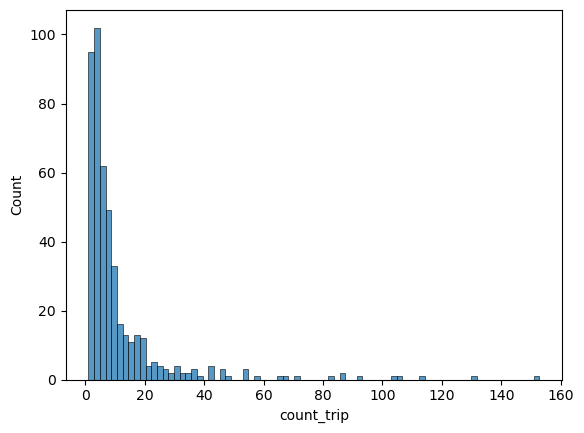

In [8]:
sns.histplot(df_analysis['count_trip'])

In [9]:
df_analysis['count_trip'].mean()

11.331426616033742

In [10]:
df_analysis['count_trip'].median()

5.826341292358698

In [11]:
df_analysis.columns

Index(['BASOMRÅDE', 'Area_m2', 'pop.dens',
       'Higher education 3 yrs or longer (%)',
       'openly unemployed and in programs', 'Average income',
       'Proportion of students', 'distance', 'LUP_Commercial',
       'LUP_Educational', 'LUP_Health', 'LUP_Other', 'LUP_Public',
       'LUP_Recreational', 'LUP_Residential', 'AreaProx', 'Rd_Resi', 'Rd_Arte',
       'Rd_Comml', 'Rd_Cyc', 'Rd_Pedes', 'Rd_Other', 'AREA_KM2', 'Population',
       'cars/pop', 'malepop %', '<=30 %', 'count_trip', 'annual_demand'],
      dtype='object')

[Text(0, 0.5, 'Area_m2'),
 Text(0, 1.5, 'pop.dens'),
 Text(0, 2.5, 'Higher education 3 yrs or longer (%)'),
 Text(0, 3.5, 'openly unemployed and in programs'),
 Text(0, 4.5, 'Average income'),
 Text(0, 5.5, 'Proportion of students'),
 Text(0, 6.5, 'distance'),
 Text(0, 7.5, 'LUP_Commercial'),
 Text(0, 8.5, 'LUP_Educational'),
 Text(0, 9.5, 'LUP_Health'),
 Text(0, 10.5, 'LUP_Other'),
 Text(0, 11.5, 'LUP_Public'),
 Text(0, 12.5, 'LUP_Recreational'),
 Text(0, 13.5, 'LUP_Residential'),
 Text(0, 14.5, 'AreaProx'),
 Text(0, 15.5, 'Rd_Resi'),
 Text(0, 16.5, 'Rd_Arte'),
 Text(0, 17.5, 'Rd_Comml'),
 Text(0, 18.5, 'Rd_Cyc'),
 Text(0, 19.5, 'Rd_Pedes'),
 Text(0, 20.5, 'Rd_Other'),
 Text(0, 21.5, 'Population'),
 Text(0, 22.5, 'cars/pop'),
 Text(0, 23.5, 'malepop %'),
 Text(0, 24.5, '<=30 %'),
 Text(0, 25.5, 'annual_demand')]

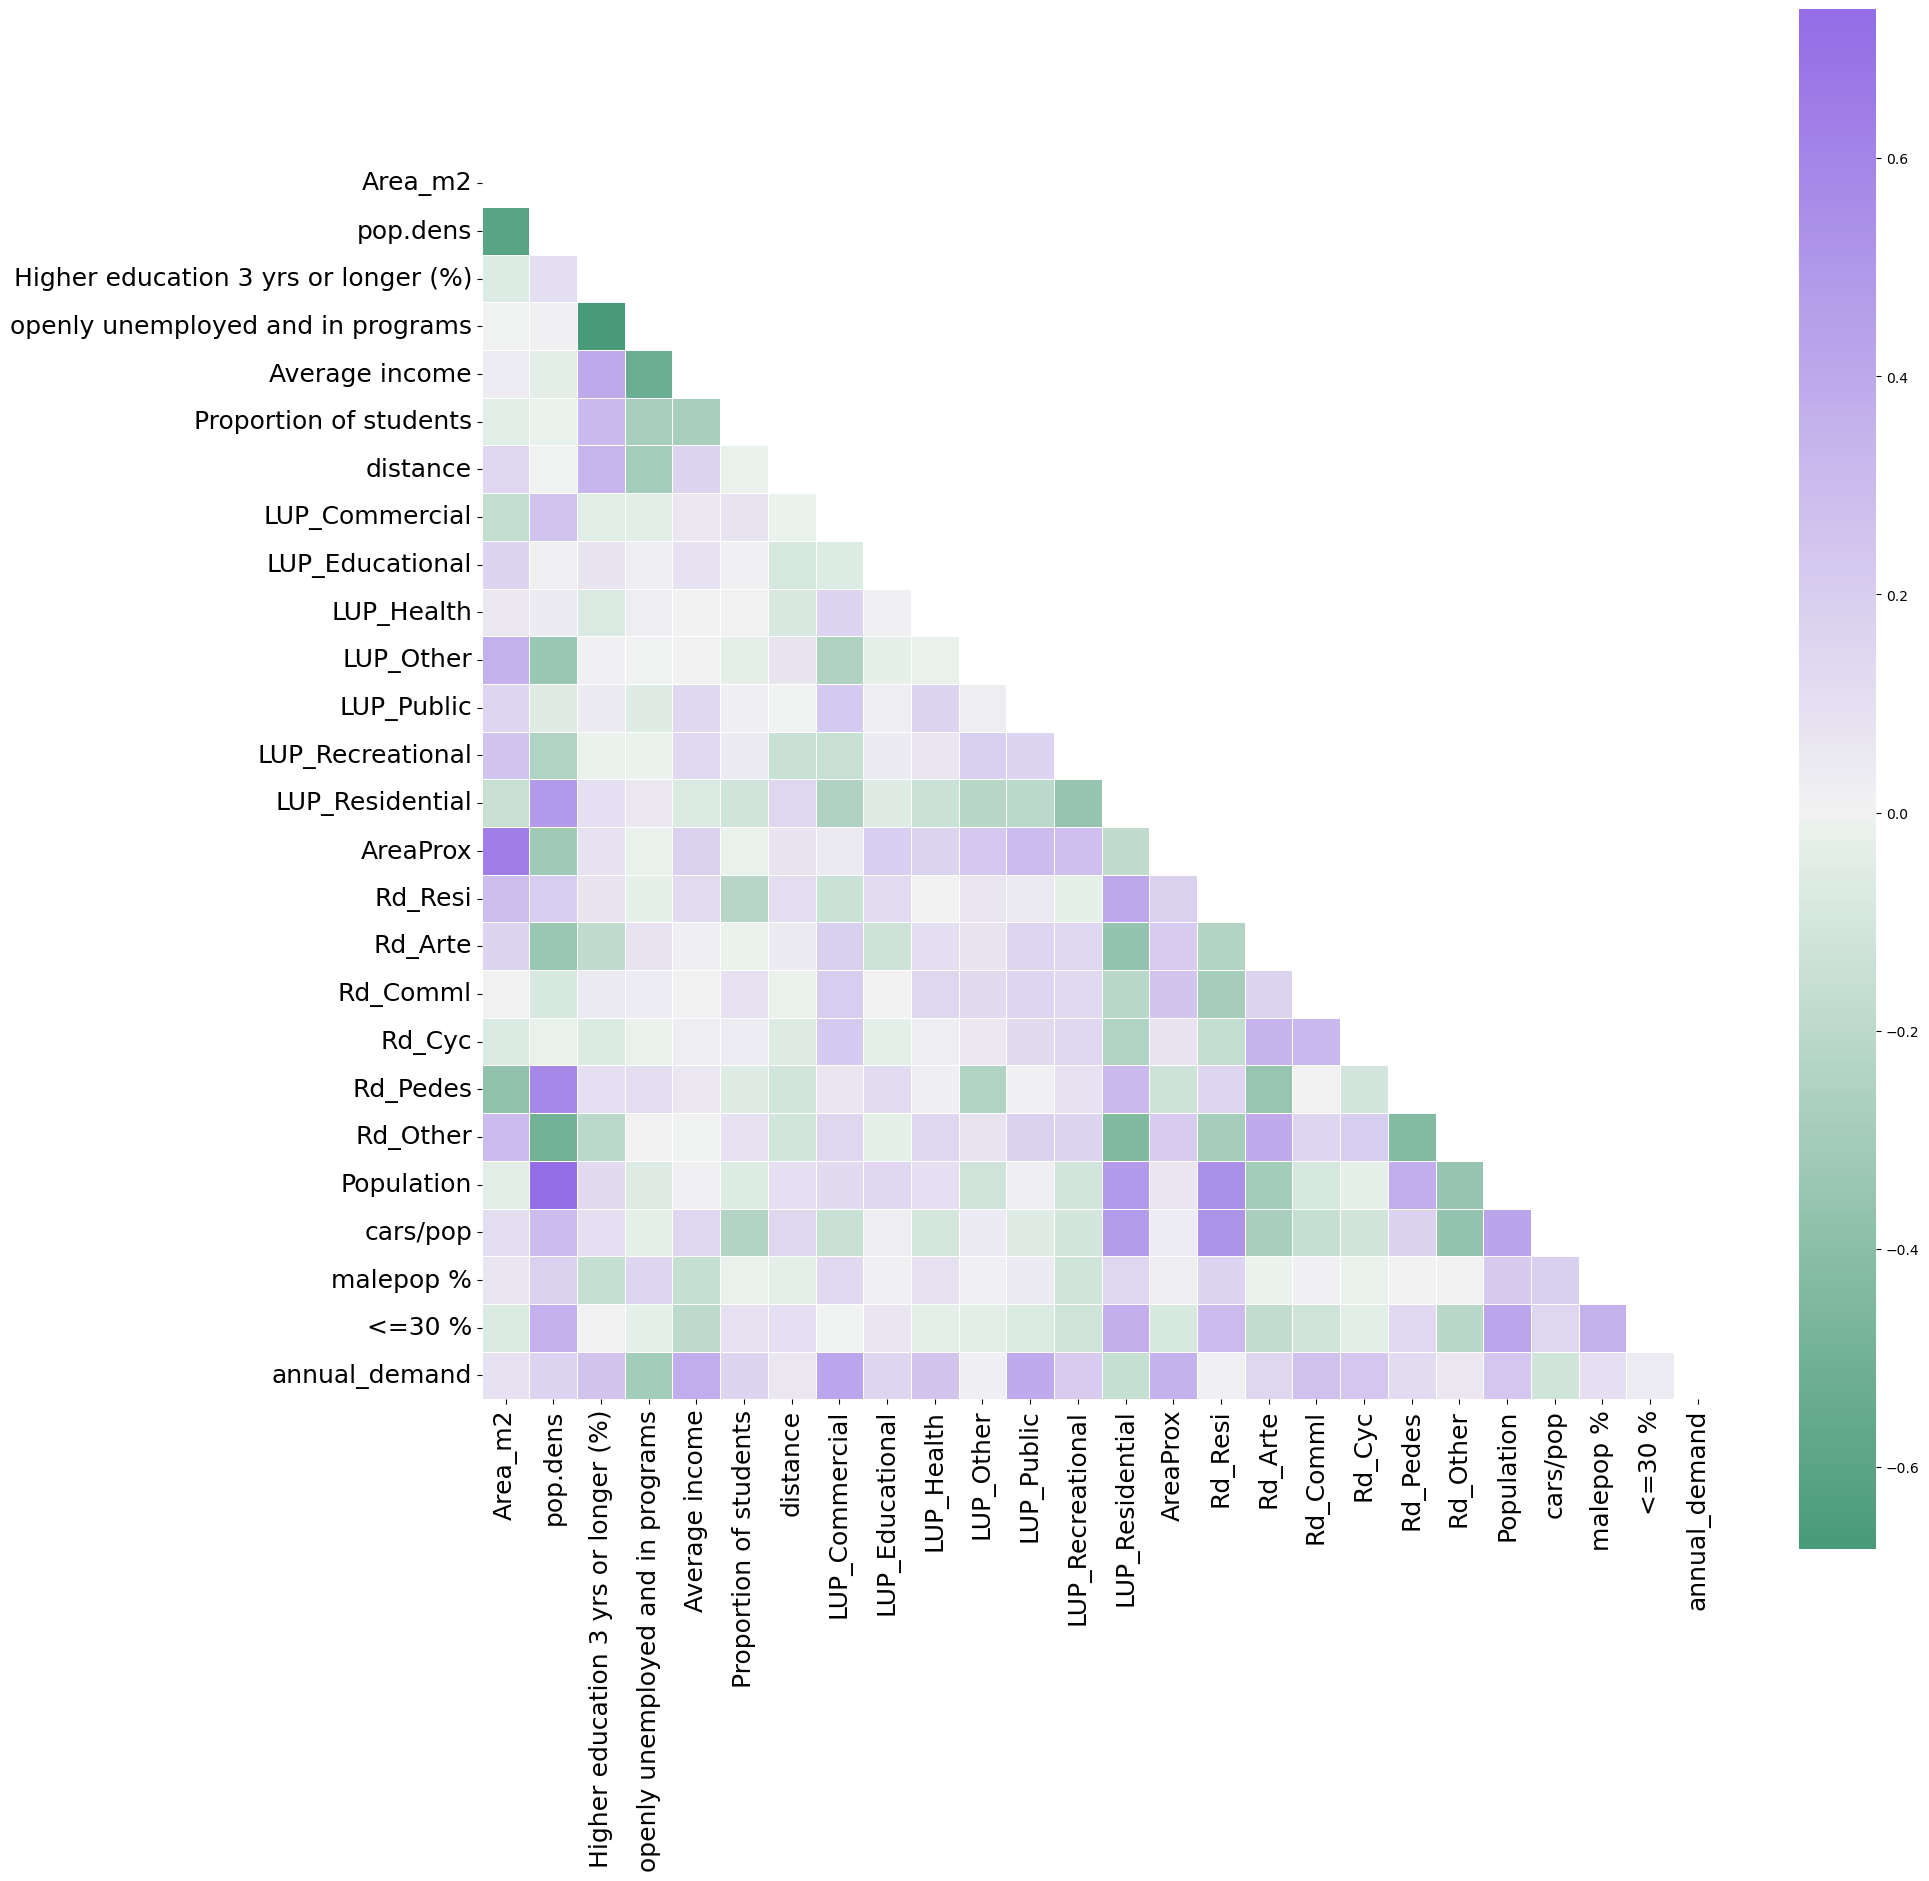

In [12]:
features_1 = ['Area_m2', 'pop.dens','Higher education 3 yrs or longer (%)','openly unemployed and in programs', 'Average income',
              'Proportion of students', 'distance', 'LUP_Commercial','LUP_Educational', 'LUP_Health', 'LUP_Other', 'LUP_Public',
              'LUP_Recreational', 'LUP_Residential', 'AreaProx', 'Rd_Resi', 'Rd_Arte','Rd_Comml', 'Rd_Cyc', 'Rd_Pedes', 'Rd_Other',
              'Population','cars/pop', 'malepop %', '<=30 %','annual_demand']
corr = df_analysis[features_1].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True,linewidths=.5, cbar_kws={"shrink": 1})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18)
#plt.savefig(f"{'C:/Users/gkun/Desktop/files_BBSdemand/Figures/'}{'correlations.png'}", bbox_inches='tight',dpi = 600 )

In [13]:
df_analysis = df_analysis.astype(float)
features_test = features_1
col_test = df_analysis[features_test]

In [14]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = col_test.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(col_test.values, i)
                          for i in range(len(col_test.columns))]
  
print(vif_data)

                                 feature         VIF
0                                Area_m2    1.917262
1                               pop.dens    6.825643
2   Higher education 3 yrs or longer (%)  137.153739
3      openly unemployed and in programs   13.967594
4                         Average income   72.876104
5                 Proportion of students   11.355813
6                               distance   48.098580
7                         LUP_Commercial    8.924755
8                        LUP_Educational    2.192362
9                             LUP_Health    1.545758
10                             LUP_Other    4.621152
11                            LUP_Public    1.977599
12                      LUP_Recreational    5.663497
13                       LUP_Residential   11.210513
14                              AreaProx    3.930051
15                               Rd_Resi    4.086523
16                               Rd_Arte    1.764649
17                              Rd_Comml    2.

In [15]:
features_test.remove('Higher education 3 yrs or longer (%)')
features_test.remove('Average income')
features_test.remove('openly unemployed and in programs')
features_test.remove('malepop %')
features_test.remove('pop.dens')
features_test.remove('annual_demand')
#'Higher education 3 yrs or longer (%)','Average income','malepop %','openly unemployed and in programs',

col_test = df_analysis[features_test]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = col_test.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(col_test.values, i)
                          for i in range(len(col_test.columns))]
  
print(vif_data)

                   feature        VIF
0                  Area_m2   1.866962
1   Proportion of students   5.291309
2                 distance  26.953150
3           LUP_Commercial   5.919315
4          LUP_Educational   1.725302
5               LUP_Health   1.334926
6                LUP_Other   3.366489
7               LUP_Public   1.784528
8         LUP_Recreational   3.831650
9          LUP_Residential   7.838471
10                AreaProx   2.539681
11                 Rd_Resi   3.442813
12                 Rd_Arte   1.690245
13                Rd_Comml   2.738972
14                  Rd_Cyc   3.153878
15                Rd_Pedes   4.441416
16                Rd_Other   1.566052
17              Population   4.730649
18                cars/pop   7.683897
19                  <=30 %   6.749454


[Text(0, 0.5, 'Area_m2'),
 Text(0, 1.5, 'Proportion of students'),
 Text(0, 2.5, 'distance'),
 Text(0, 3.5, 'LUP_Commercial'),
 Text(0, 4.5, 'LUP_Educational'),
 Text(0, 5.5, 'LUP_Health'),
 Text(0, 6.5, 'LUP_Other'),
 Text(0, 7.5, 'LUP_Public'),
 Text(0, 8.5, 'LUP_Recreational'),
 Text(0, 9.5, 'LUP_Residential'),
 Text(0, 10.5, 'AreaProx'),
 Text(0, 11.5, 'Rd_Resi'),
 Text(0, 12.5, 'Rd_Arte'),
 Text(0, 13.5, 'Rd_Comml'),
 Text(0, 14.5, 'Rd_Cyc'),
 Text(0, 15.5, 'Rd_Pedes'),
 Text(0, 16.5, 'Rd_Other'),
 Text(0, 17.5, 'Population'),
 Text(0, 18.5, 'cars/pop'),
 Text(0, 19.5, '<=30 %')]

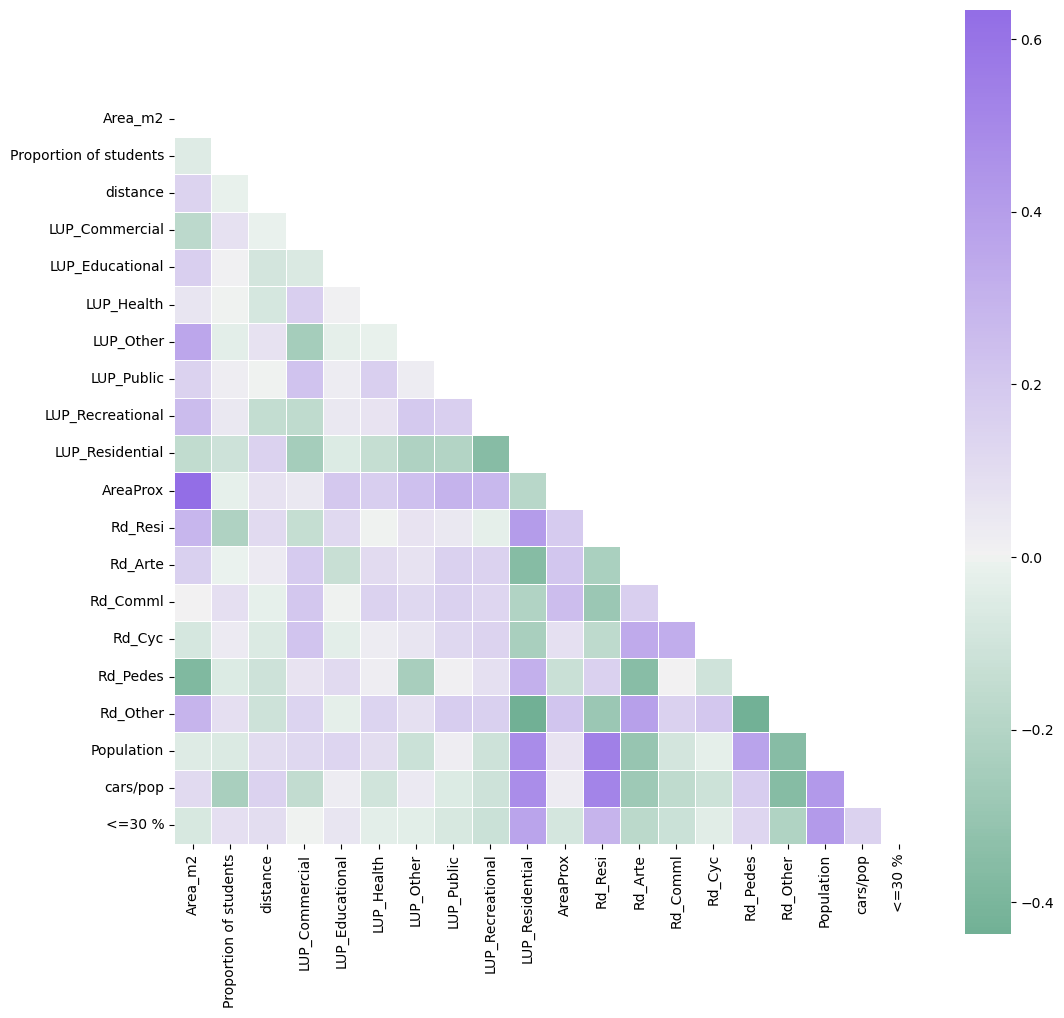

In [16]:
features_1 = features_test
corr = df_analysis[features_1].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True,linewidths=.5, cbar_kws={"shrink": 1})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 10)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 10)

In [17]:
features_1

['Area_m2',
 'Proportion of students',
 'distance',
 'LUP_Commercial',
 'LUP_Educational',
 'LUP_Health',
 'LUP_Other',
 'LUP_Public',
 'LUP_Recreational',
 'LUP_Residential',
 'AreaProx',
 'Rd_Resi',
 'Rd_Arte',
 'Rd_Comml',
 'Rd_Cyc',
 'Rd_Pedes',
 'Rd_Other',
 'Population',
 'cars/pop',
 '<=30 %']

# modeling

In [18]:
X = df_analysis[features_1].values
y = df_analysis['count_trip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
parameters_rf = {'max_depth': 13, 'max_features': 5, 'n_estimators': 150}

In [19]:
def run_model(model, X_train, y_train, X_test, y_test,names, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    EVS = explained_variance_score(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared = False) 
    r2 = r2_score(y_test,y_pred)
    #recall = recall_score(y_test,y_pred)
    #f1 = f1_score(y_test,y_pred)
    time_taken = time.time()-t0
    print("explained_variance = {}".format(EVS))
    print("RMSE = {}".format(RMSE))
    print("r2 = {}".format(r2))
    print("Time taken = {}".format(time_taken))
    return model, EVS, RMSE,r2, time_taken

# Random Forest


In [20]:
regressor_rf = RandomForestRegressor()
parameter = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],  # Corrected here
    'bootstrap': [True, False]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_rf = GridSearchCV(
    regressor_rf,
    parameter,
    scoring=['r2', 'neg_mean_squared_error'],  # List of scoring metrics
    refit='r2',  # Choose the best model based on R2 score
    cv=kf,
    verbose=2  # For detailed output, adjust as needed
)
clf_rf.fit(X, y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_esti

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=2)

In [21]:
clf_rf.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [22]:
parameters_rf = clf_rf.best_params_
regressor_rf = RandomForestRegressor(**parameters_rf, random_state=42)
model_rf = regressor_rf.fit(X,y)

In [23]:
model_t = model_rf
scores_r = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'r2')
scores_rmse = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'neg_root_mean_squared_error')
scores_ev = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'explained_variance')
print("r2  " + str(scores_r.mean()))
print("scores_rmse " + str(abs(scores_rmse.mean())))
print("scores_ev " + str(scores_ev.mean()))

r2  0.4791703182678019
scores_rmse 11.702309063751091
scores_ev 0.4686943556213145


In [24]:
model_t = model_rf

kf = KFold(n_splits=10, shuffle=True)
scores_r = cross_val_score(model_t, X, y, cv=kf, scoring='r2')
for i, score in enumerate(scores_r, 1):
    print(f"Fold {i} R2 score: {score:.2f}")
print("Mean R2 score: " + str(scores_r.mean()))

scores_rmse = cross_val_score(model_t, X, y, cv=kf, scoring='neg_root_mean_squared_error')
for i, score in enumerate(scores_rmse, 1):
    print(f"Fold {i} RMSE score: {abs(score):.2f}")
print("Mean RMSE score: " + str(abs(scores_rmse.mean())))

scores_ev = cross_val_score(model_t, X, y, cv=kf, scoring='explained_variance')
for i, score in enumerate(scores_ev, 1):
    print(f"Fold {i} Explained Variance score: {score:.2f}")
print("Mean Explained Variance score: " + str(scores_ev.mean()))

Fold 1 R2 score: 0.70
Fold 2 R2 score: 0.06
Fold 3 R2 score: 0.64
Fold 4 R2 score: 0.48
Fold 5 R2 score: 0.50
Fold 6 R2 score: 0.74
Fold 7 R2 score: 0.56
Fold 8 R2 score: 0.31
Fold 9 R2 score: 0.44
Fold 10 R2 score: 0.46
Mean R2 score: 0.48883780446518577
Fold 1 RMSE score: 7.89
Fold 2 RMSE score: 8.61
Fold 3 RMSE score: 11.49
Fold 4 RMSE score: 11.51
Fold 5 RMSE score: 21.98
Fold 6 RMSE score: 7.92
Fold 7 RMSE score: 7.92
Fold 8 RMSE score: 15.84
Fold 9 RMSE score: 6.55
Fold 10 RMSE score: 9.09
Mean RMSE score: 10.878398011616884
Fold 1 Explained Variance score: 0.58
Fold 2 Explained Variance score: 0.79
Fold 3 Explained Variance score: 0.68
Fold 4 Explained Variance score: 0.54
Fold 5 Explained Variance score: 0.17
Fold 6 Explained Variance score: 0.57
Fold 7 Explained Variance score: -0.09
Fold 8 Explained Variance score: 0.26
Fold 9 Explained Variance score: 0.49
Fold 10 Explained Variance score: 0.46
Mean Explained Variance score: 0.4448071061570328


In [25]:
modellr = LinearRegression()
modellr.fit(X, y)

predictions = modellr.predict(X)

print('Coefficients:', modellr.coef_)
print('Intercept:', modellr.intercept_)

Coefficients: [-2.58779062e-06  3.03291891e+01 -2.73345842e-03  5.78552195e+00
 -1.50287063e+00 -8.29872556e+00 -2.39588272e+00  1.50543453e+01
 -1.21121578e-01 -4.53902426e+00  2.60389083e+01  2.55807092e-04
  6.91427197e-05 -1.27289099e-05  2.08400711e-04  1.29133311e-04
  1.67340100e-04  3.05872598e-03 -6.99808053e+00 -2.67752697e+00]
Intercept: -1.3353863172900589


In [26]:
model_t = modellr
scores_r = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'r2')
scores_rmse = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'neg_root_mean_squared_error')
scores_ev = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'explained_variance')
print("r2  " + str(scores_r.mean()))
print("scores_rmse " + str(abs(scores_rmse.mean())))
print("scores_ev " + str(scores_ev.mean()))

r2  0.3069602476495023
scores_rmse 13.850151968957215
scores_ev 0.2643767475158425


                  features  importances
10          Tram-Bus stops     0.281616
7               POI public     0.091660
1   Proportion of students     0.071446
3           POI commercial     0.050403
8         POI recreational     0.047873
9          POI residential     0.047625
11       Residential roads     0.041301
0                  Area_m2     0.040800
15        Pedestrian roads     0.040321
5               POI health     0.034540
16             Other roads     0.032068
17              Population     0.030916
14             Cycle roads     0.027285
18                cars/pop     0.027280
12          Arterial roads     0.026994
19            Young people     0.024233
13        Commercial roads     0.024102
2                 distance     0.023320
6                POI other     0.023113
4          POI educational     0.013104


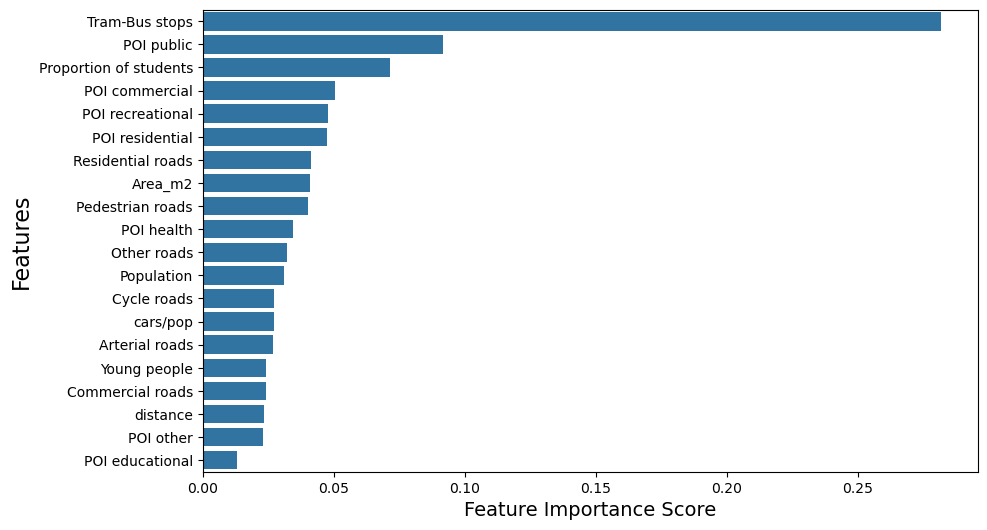

In [27]:
result1 = pd.DataFrame({"features":features_1,
        "importances":model_rf.feature_importances_})

result1['features'] = result1['features'].replace('LUP_Commercial', 'POI commercial')
result1['features'] = result1['features'].replace('LUP_Educational', 'POI educational')
result1['features'] = result1['features'].replace('LUP_Health', 'POI health')
result1['features'] = result1['features'].replace('LUP_Other', 'POI other')
result1['features'] = result1['features'].replace('LUP_Public', 'POI public')
result1['features'] = result1['features'].replace('LUP_Recreational', 'POI recreational')
result1['features'] = result1['features'].replace('LUP_Residential', 'POI residential')
result1['features'] = result1['features'].replace('Rd_Resi', 'Residential roads')
result1['features'] = result1['features'].replace('Rd_Arte', 'Arterial roads')
result1['features'] = result1['features'].replace('Rd_Comml', 'Commercial roads')
result1['features'] = result1['features'].replace('Rd_Cyc', 'Cycle roads')
result1['features'] = result1['features'].replace('Rd_Pedes', 'Pedestrian roads')
result1['features'] = result1['features'].replace('Rd_Other', 'Other roads')
result1['features'] = result1['features'].replace('AREA_KM2', 'Area')
result1['features'] = result1['features'].replace('<=30 %', 'Young people')
result1['features'] = result1['features'].replace('AreaProx', 'Tram-Bus stops')

result = result1.sort_values(by='importances',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=result['importances'], y=result['features'])
# Add labels to your graph
print(result)

plt.xlabel('Feature Importance Score', fontsize='14')
plt.ylabel('Features', fontsize='16')
#plt.title("Visualizing Important Features")

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)